Use the 0.1 K data from the 2017-02-10 cooldown to create a delay estimate for the r1h11 build.

The fits look good: use delay estimate of -15.307 microseconds.

In [1]:
%matplotlib inline

In [2]:
from collections import defaultdict

In [3]:
from kid_readout.measurement.io import npy
from kid_readout.measurement import plot_basic
from kid_readout.analysis.resonator.lmfit_resonator import LinearLossResonatorWithCable

In [4]:
npd = npy.NumpyDirectory('/data/detectors/2017-02-15_155457_centered.npd/')

In [5]:
#swp_list = [npd.read(name) for name in npd.node_names() if name.startswith('SingleSweep') and not 'Stream' in name]
sss_list = [npd.read(name) for name in npd.node_names() if name.startswith('SingleSweepStream')]

In [6]:
sss_dict = defaultdict(list)
for sss in sss_list:
    sss_dict[sss.state.lo_index].append(sss)

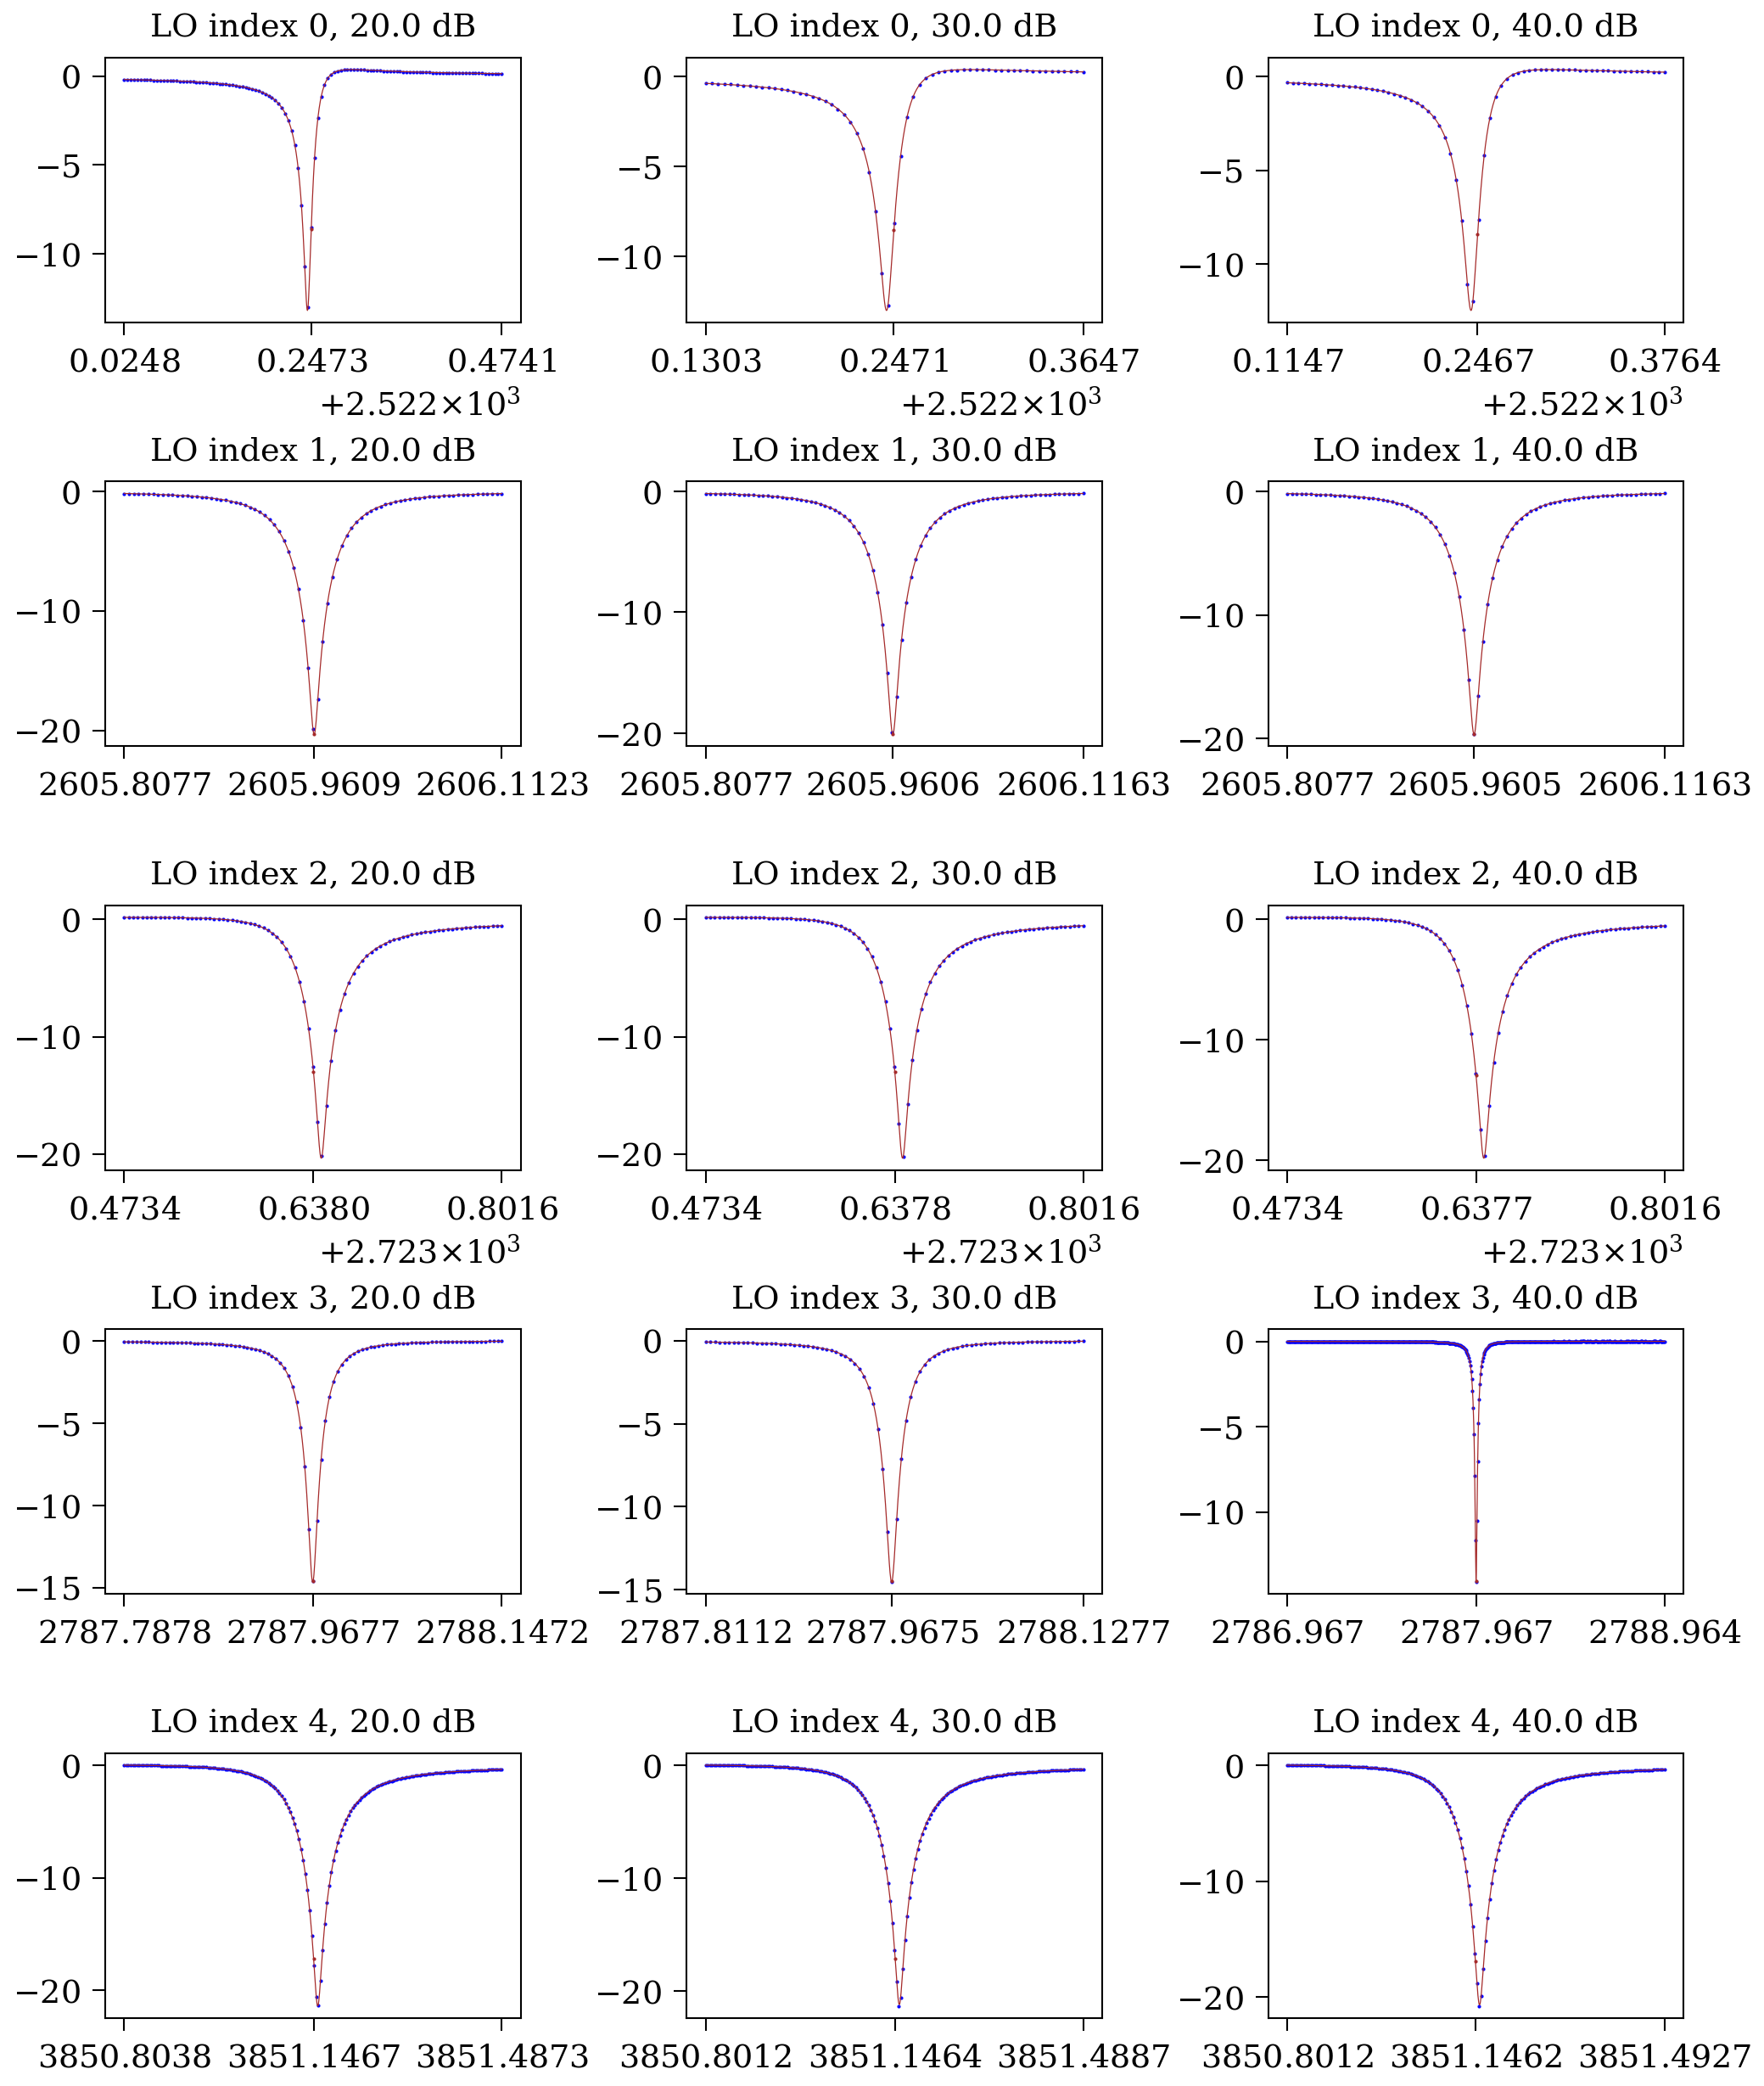

In [9]:
fig, axes = plt.subplots(5, 3, figsize=(8, 10), gridspec_kw={'wspace': 0.4, 'hspace': 0.6})
for sss, ax in zip(sss_list, axes.flatten()):
    plot_basic.resonator_amplitude(sss.resonator, ax, normalize=True)
    ax.set_title("LO index {:d}, {:.1f} dB".format(sss.state.lo_index, sss.stream.roach_state.dac_attenuation))

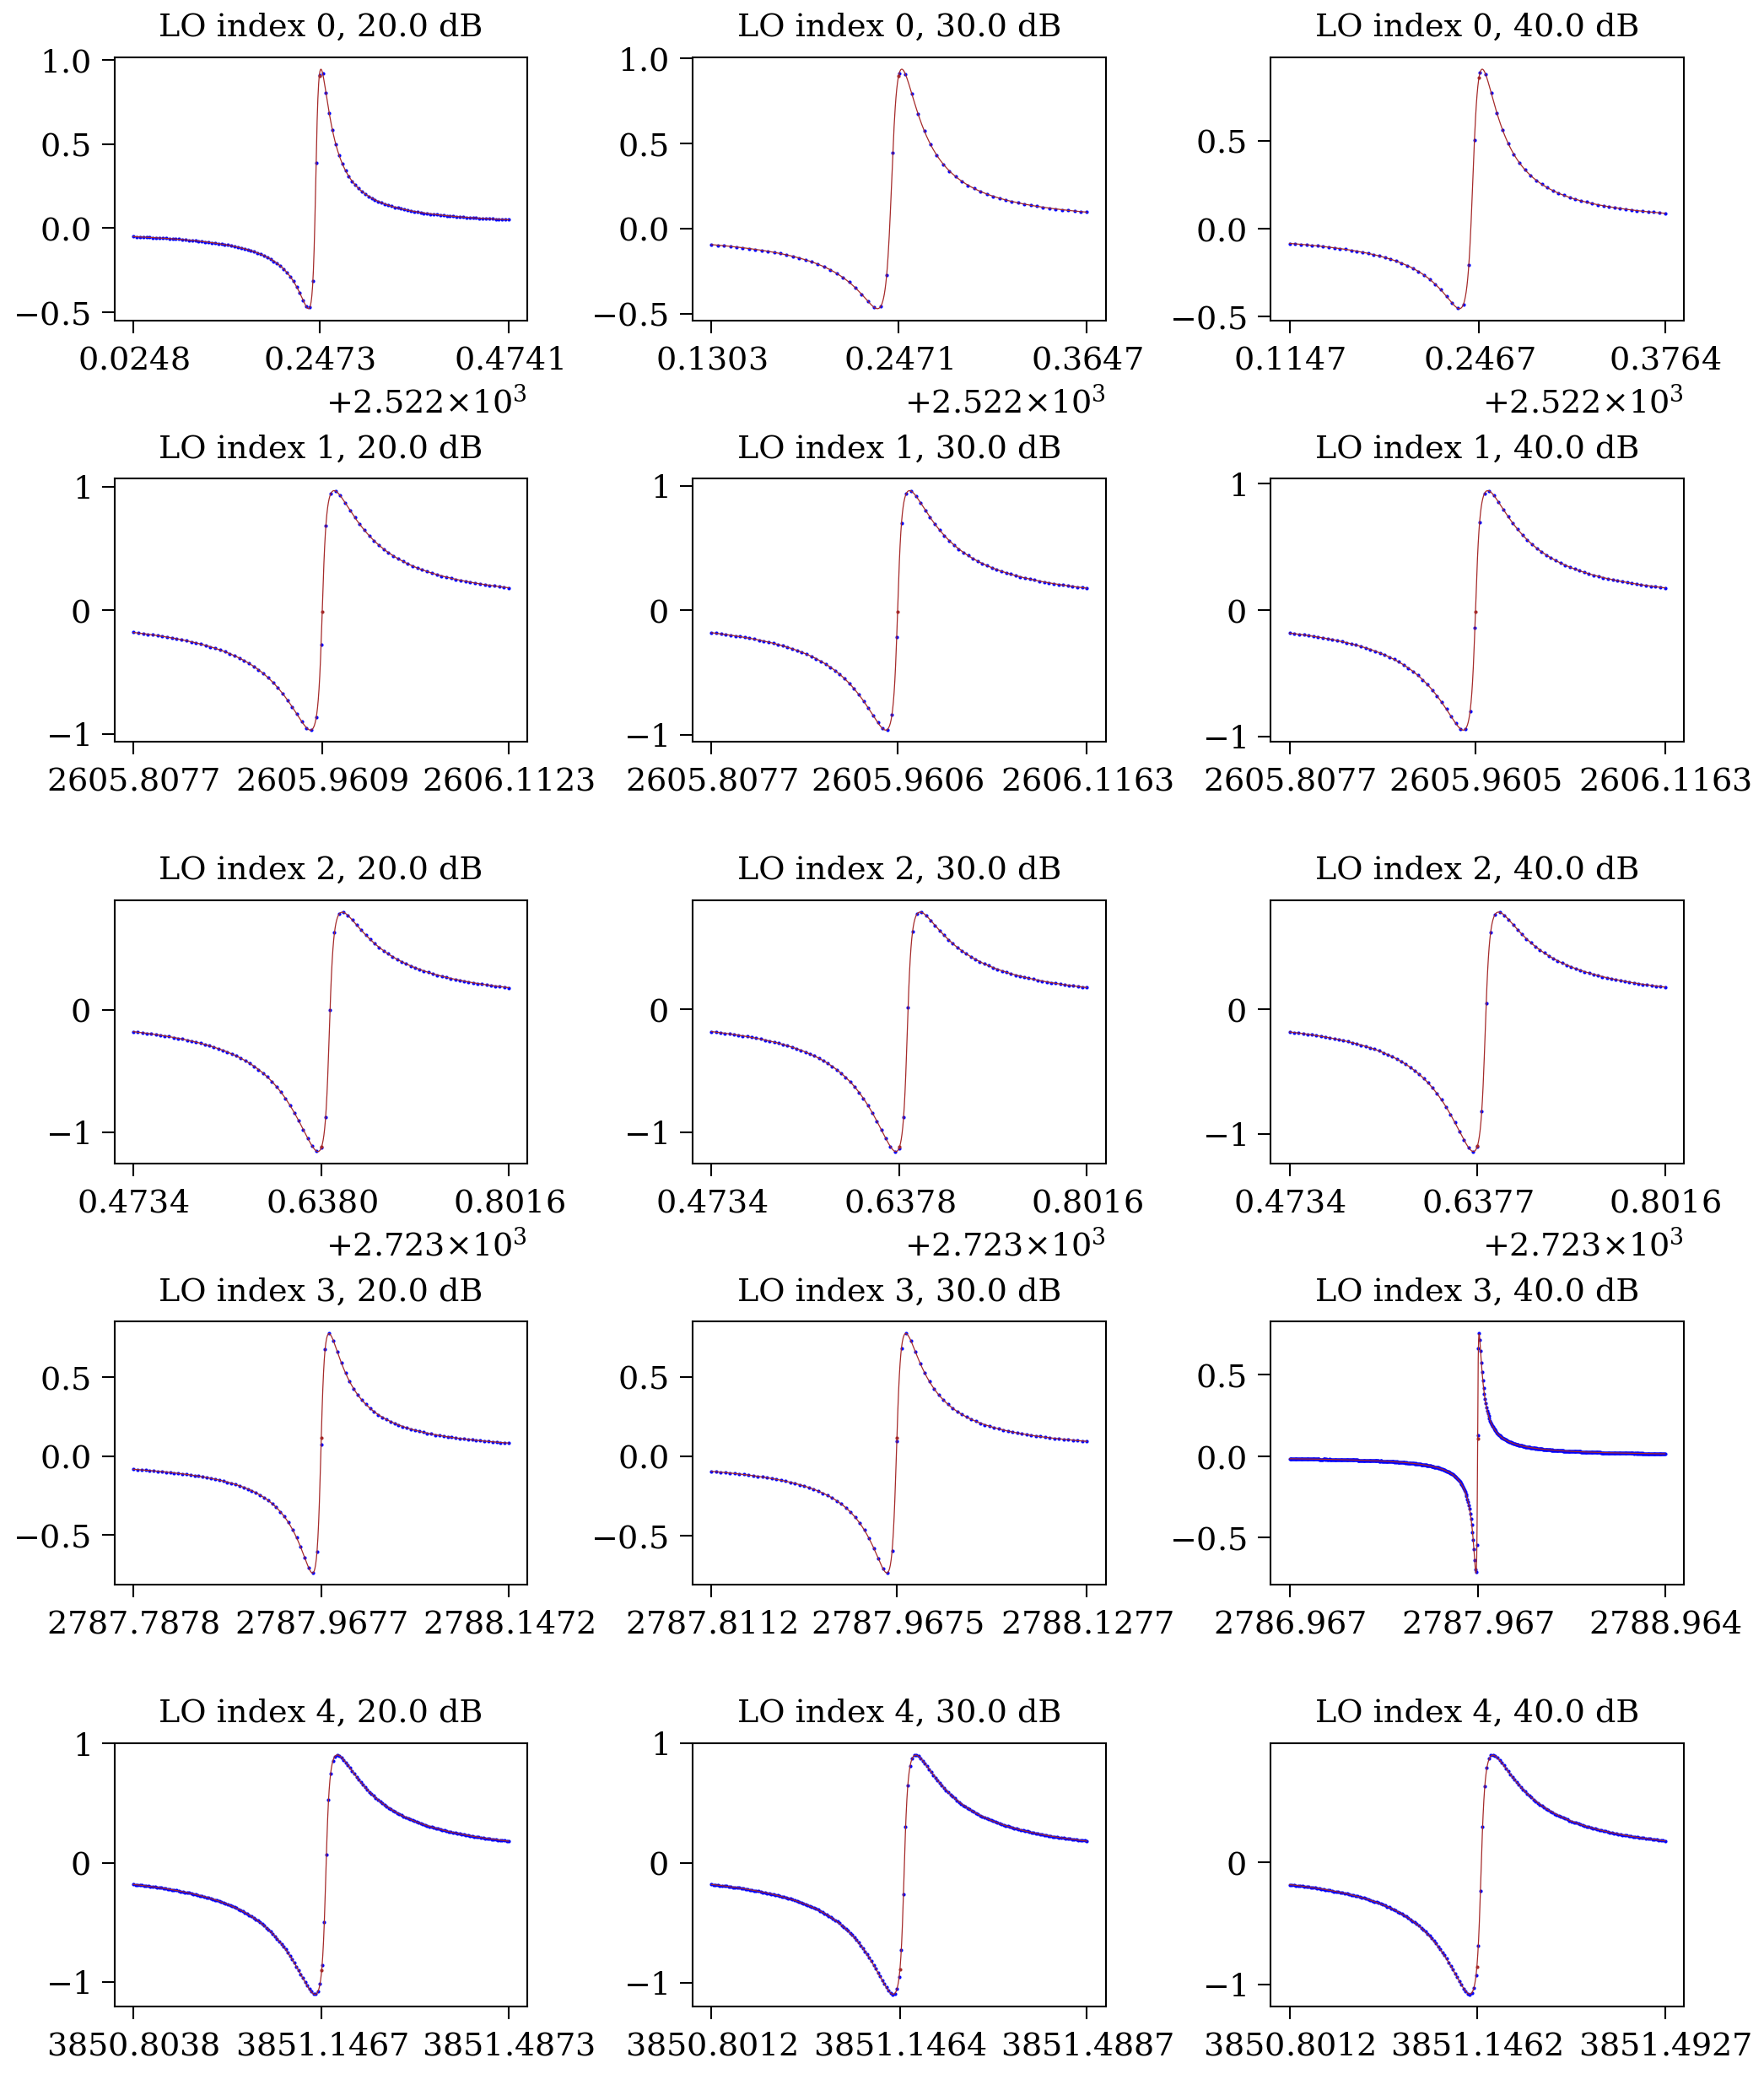

In [10]:
fig, axes = plt.subplots(5, 3, figsize=(8, 10), gridspec_kw={'wspace': 0.4, 'hspace': 0.6})
for sss, ax in zip(sss_list, axes.flatten()):
    plot_basic.resonator_phase(sss.resonator, ax, normalize=True)
    ax.set_title("LO index {:d}, {:.1f} dB".format(sss.state.lo_index, sss.stream.roach_state.dac_attenuation))

In [23]:
mean_delay = np.mean([sss.resonator.delay for sss in sss_list])
print("Mean delay: {:.5g}".format(mean_delay))

Mean delay: -1.5307e-05


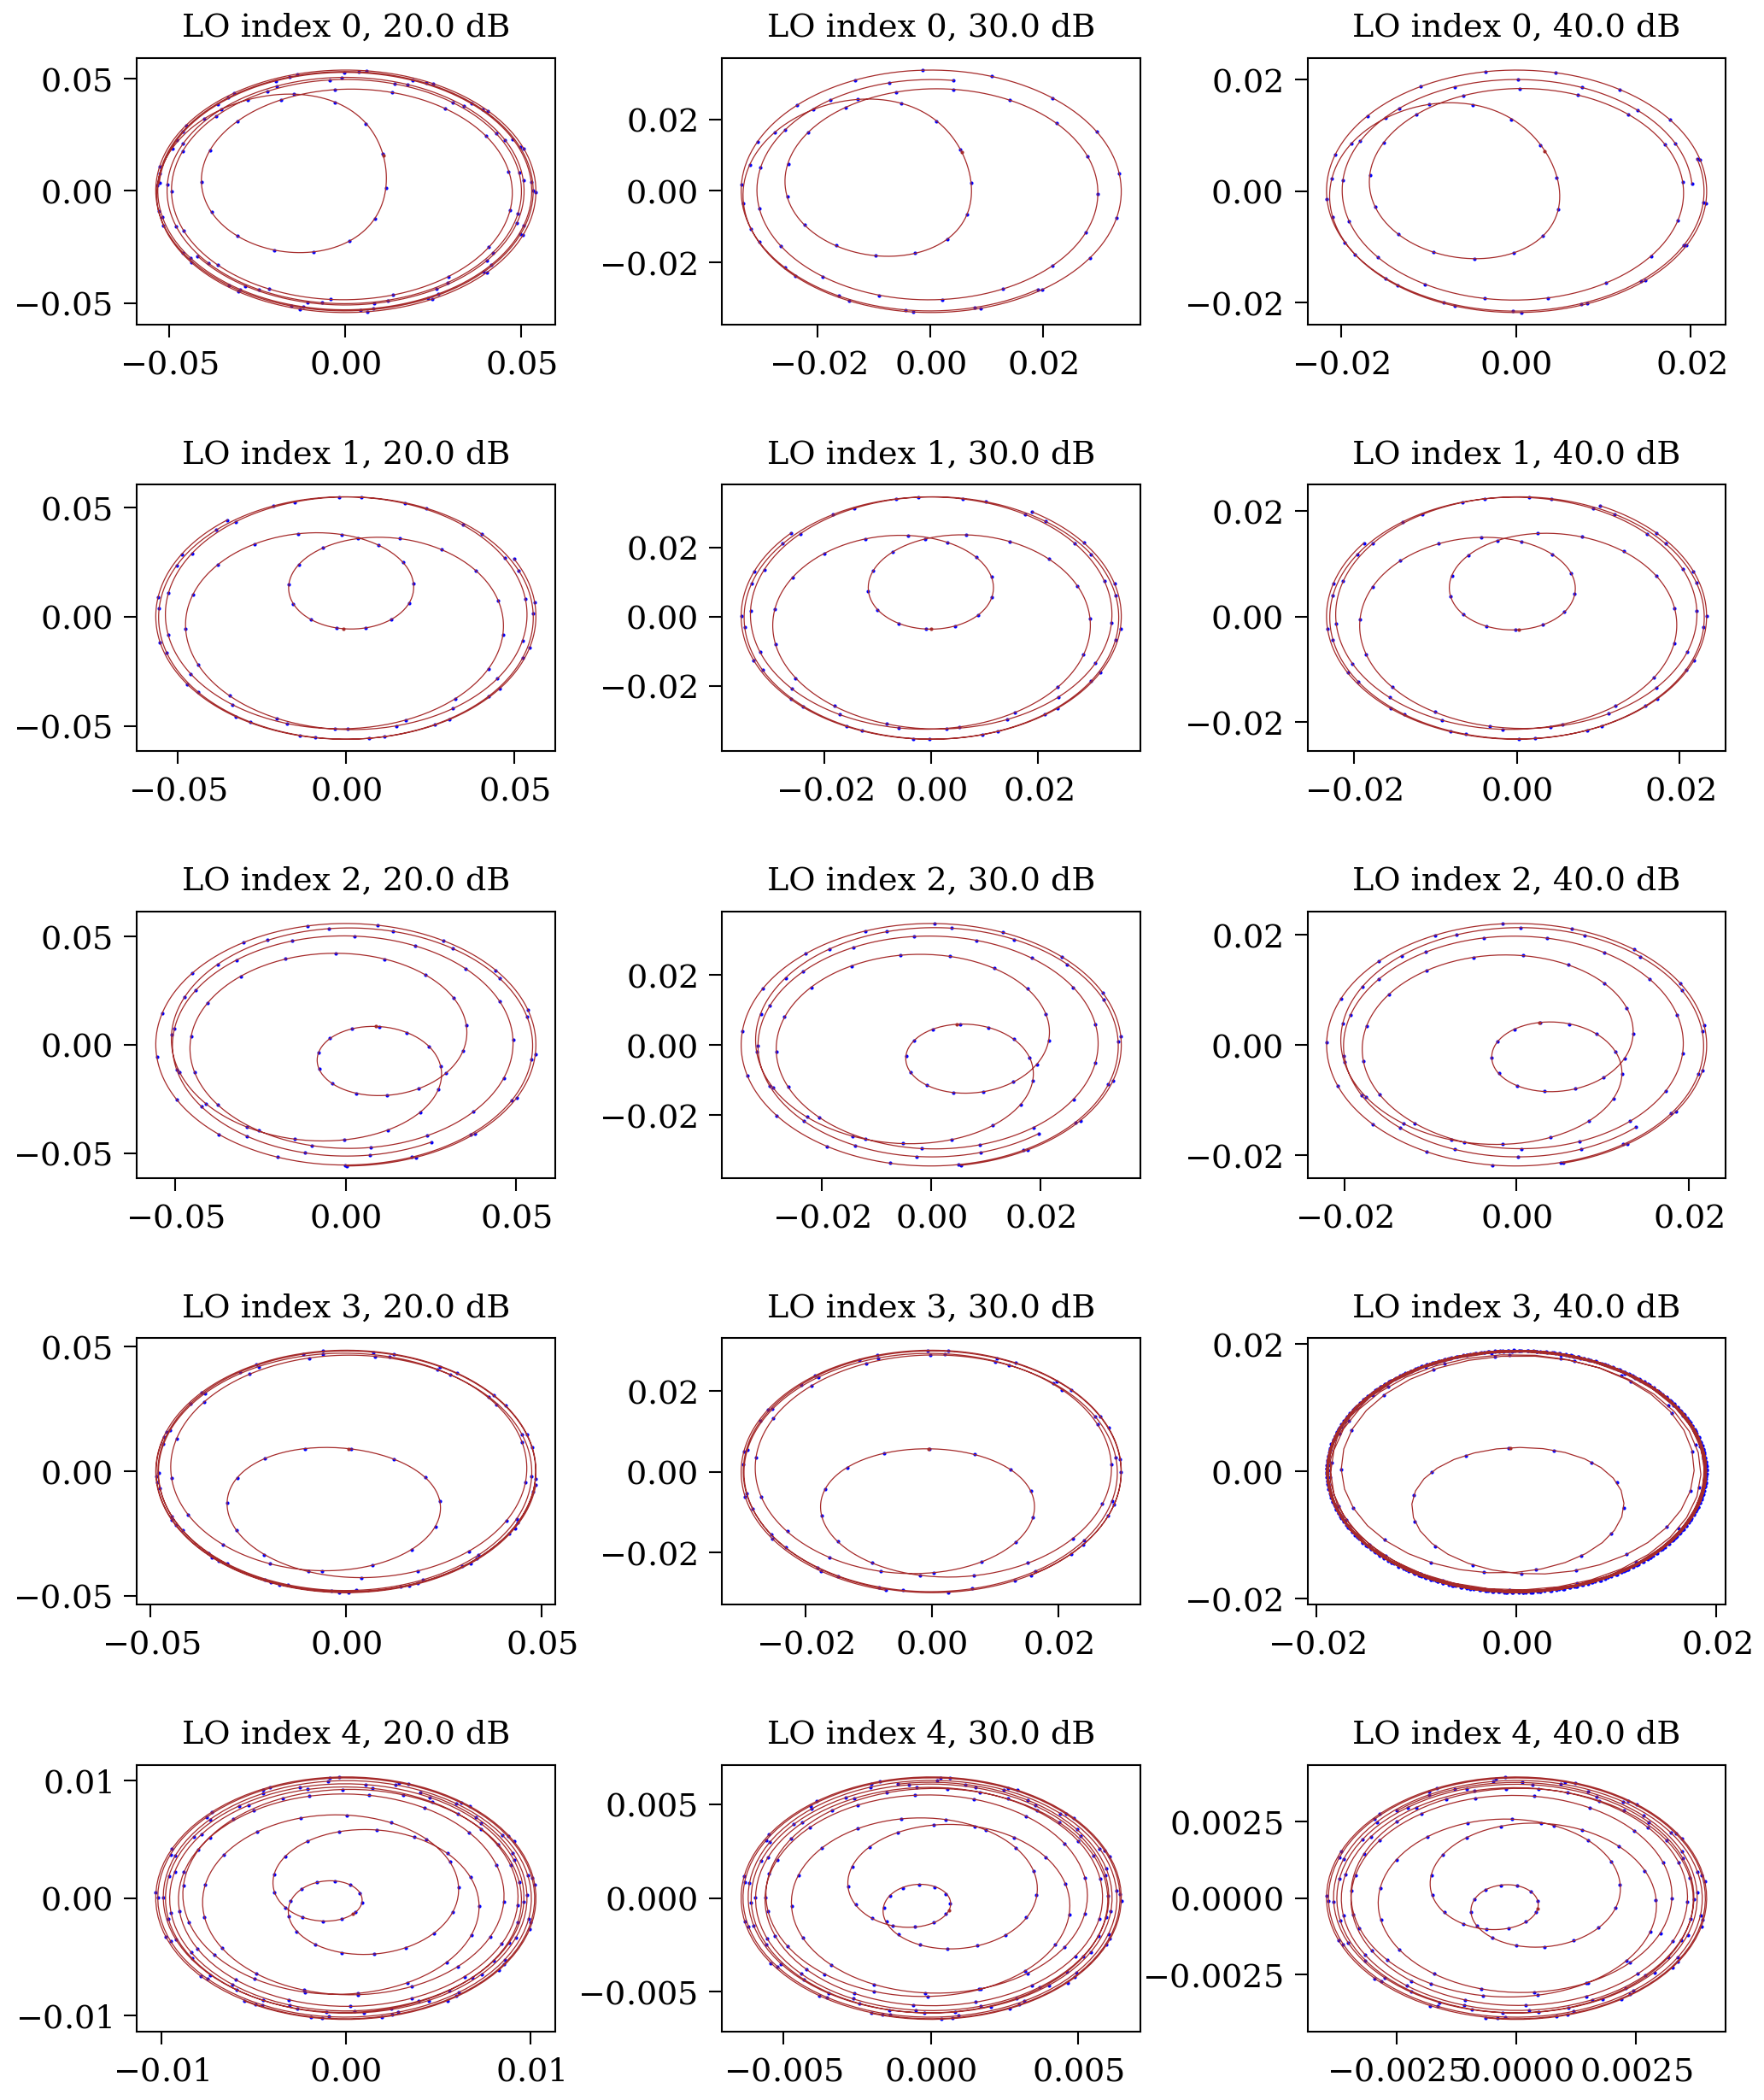

In [24]:
fig, axes = plt.subplots(5, 3, figsize=(8, 10), gridspec_kw={'wspace': 0.4, 'hspace': 0.6})
for sss, ax in zip(sss_list, axes.flatten()):
    plot_basic.resonator_complex_plane(sss.resonator, ax, normalize=False)
    ax.set_title("LO index {:d}, {:.1f} dB".format(sss.state.lo_index, sss.stream.roach_state.dac_attenuation))

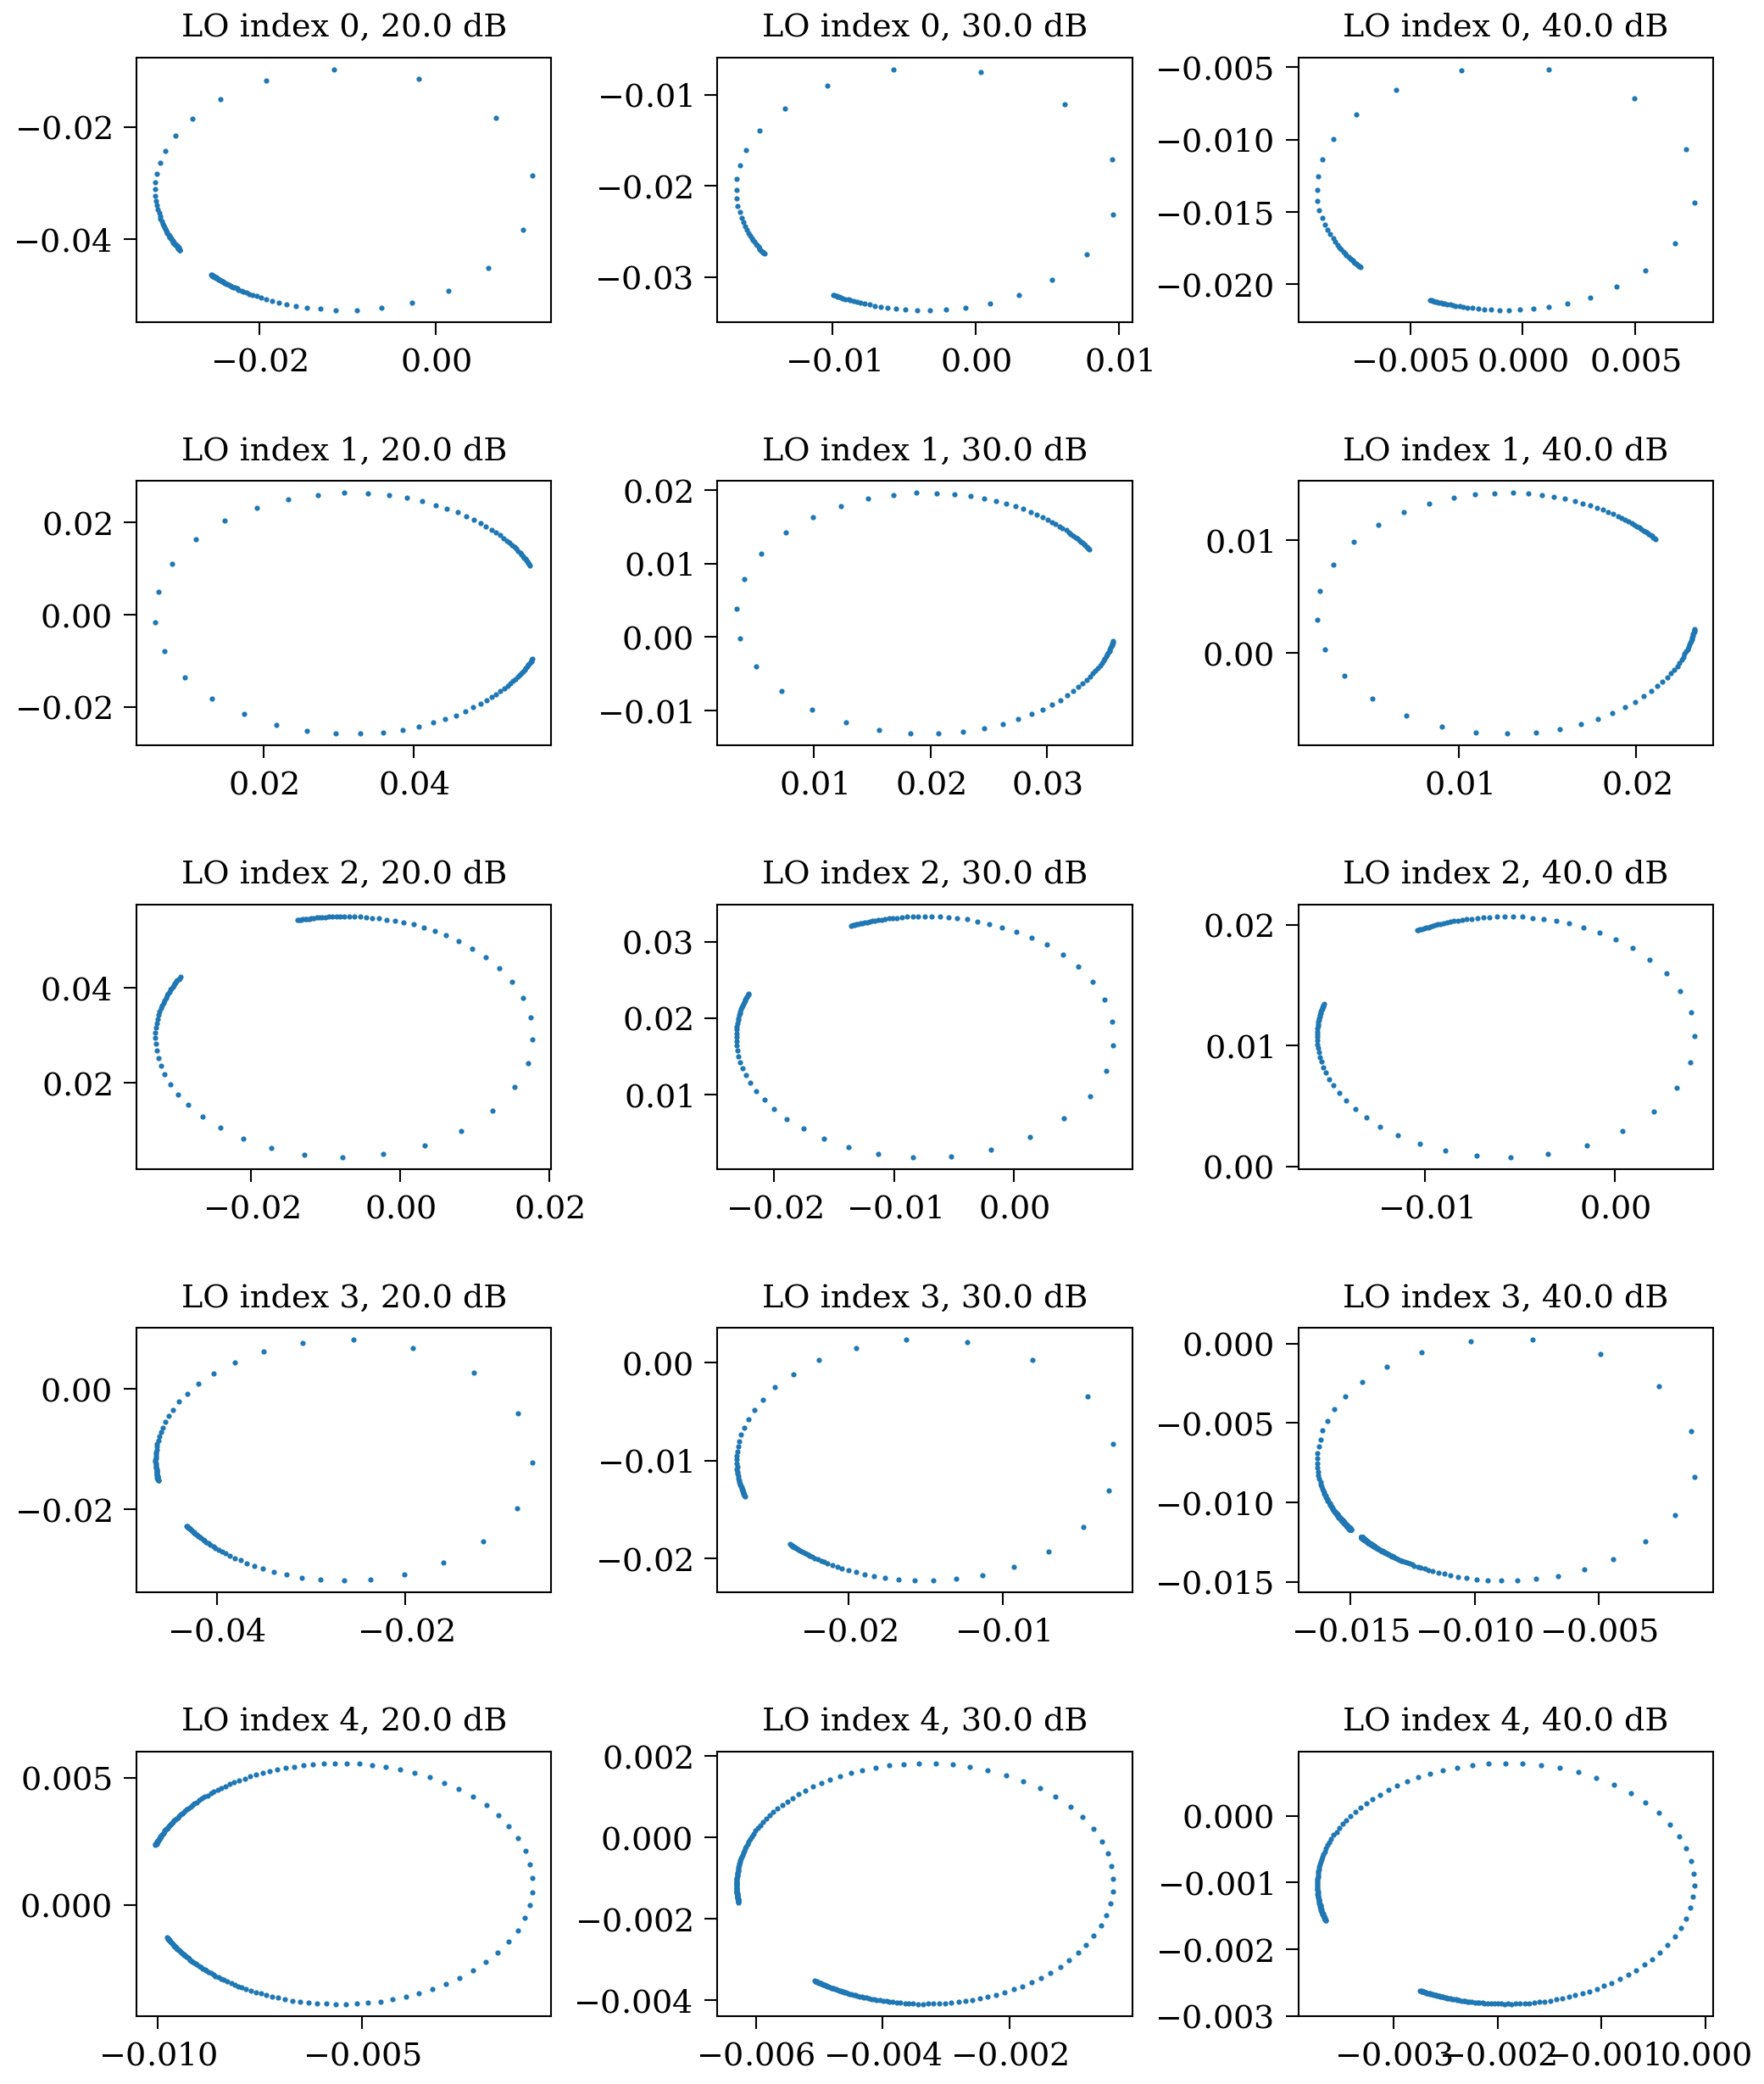

In [25]:
fig, axes = plt.subplots(5, 3, figsize=(8, 10), gridspec_kw={'wspace': 0.4, 'hspace': 0.6})
for sss, ax in zip(sss_list, axes.flatten()):
    undelayed = sss.sweep.s21_point * np.exp(2j * np.pi * mean_delay * sss.sweep.frequency)
    ax.plot(undelayed.real, undelayed.imag, '.')
    ax.set_title("LO index {:d}, {:.1f} dB".format(sss.state.lo_index, sss.stream.roach_state.dac_attenuation))